# Calculating Boundary Layer Height (BLH) and Box Model

In [351]:
import xarray as xr

Days and times of interest:

July 21, 2009 Flight 1 Time 7:55 - 11:47pm utc | 12:55 - 4:47pm pst      
July 23, 2009 Flight 2 Time 7:17 - 8:53pm utc | 12:17 - 1:53pm pst       
June 29, 2010 Flight 1 Time 7:07 - 10:48pm utc | 12:07 - 3:48pm pst    
July 1, 2010 Flight 2 Time 7:23 - 10:34pm utc | 12:23 - 3:34pm pst    
June 25, 2014 Flight 4 Time 5:05 - 6:38pm utc | 10:05 - 11:38am pst     
June 18, 2016 Flight 2 Time 5:22 - 8:08pm utc | 10:22 - 1:08pm pst     
December 7, 2021 Flight 2 Time 7:45 - 11:39pm utc | 11:45 - 3:39pm pst     
December 10, 2021 Flight 6 Time 9:44 - 11:31pm utc | 1:44 - 3:31pm pst     
         
*PST (winter) is 8 hours behind, PDT (summer) is 7 hours behind UTC 

In [352]:
#data sets include data for 37-38N, 120-121W
july2009 = xr.open_dataset("blh/579392.BLH.e5.oper.an.sfc.128_159_blh.ll025sc.2009070100_2009073123.nc")
june2010 = xr.open_dataset("blh/579392.BLH.e5.oper.an.sfc.128_159_blh.ll025sc.2010060100_2010063023.nc")
july2010 = xr.open_dataset("blh/579392.BLH.e5.oper.an.sfc.128_159_blh.ll025sc.2010070100_2010073123.nc")
june2014 = xr.open_dataset("blh/579392.BLH.e5.oper.an.sfc.128_159_blh.ll025sc.2014060100_2014063023.nc")
june2016 = xr.open_dataset("blh/579392.BLH.e5.oper.an.sfc.128_159_blh.ll025sc.2016060100_2016063023.nc")
december2021 = xr.open_dataset("blh/579392.BLH.e5.oper.an.sfc.128_159_blh.ll025sc.2021120100_2021123123.nc")

In [353]:
#time slices come from spreadsheet
july21_09=july2009.sel(time=slice('2009-07-21T19:00:00.000000000','2009-07-22T00:00:00.000000000'))
july23_09=july2009.sel(time=slice('2009-07-23T19:00:00.000000000','2009-07-23T21:00:00.000000000'))
june29_10=june2010.sel(time=slice('2010-06-29T19:00:00.000000000','2010-06-29T23:00:00.000000000'))
july1_10=july2010.sel(time=slice('2010-07-1T19:00:00.000000000','2010-07-1T23:00:00.000000000'))
june25_14=june2014.sel(time=slice('2014-06-25T17:00:00.000000000','2014-06-25T19:00:00.000000000'))
june18_16=june2016.sel(time=slice('2016-06-18T17:00:00.000000000','2016-06-18T21:00:00.000000000'))
dec7_21=december2021.sel(time=slice('2021-12-07T19:00:00.000000000','2021-12-8T00:00:00.000000000'))
dec10_21=december2021.sel(time=slice('2021-12-10T21:00:00.000000000','2021-12-11T00:00:00.000000000'))

In [418]:
flights = [july21_09, july23_09, june29_10, july1_10, june25_14, june18_16, dec7_21, dec10_21]
december2021

<xarray.Dataset>
Dimensions:    (time: 744, latitude: 5, longitude: 5)
Coordinates:
  * latitude   (latitude) float64 38.0 37.75 37.5 37.25 37.0
  * longitude  (longitude) float64 239.0 239.2 239.5 239.8 240.0
  * time       (time) datetime64[ns] 2021-12-01 ... 2021-12-31T23:00:00
Data variables:
    BLH        (time, latitude, longitude) float32 ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.8.1
    CONVERSION_PLATFORM:  Linux r1i4n9 4.12.14-95.51-default #1 SMP Fri Apr 1...
    CONVERSION_DATE:      Wed Mar  2 20:28:43 MST 2022
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Wed Jul 27 01:47:07 2022: ncks -d latitude,37.0,38....
    NCO:                  netCDF Operators version 5.0.3 (Homepage = http://n...

In [174]:
#convert times
import pandas as pd
def convert(data):
    date = pd.Series(data.time.values)
    date = date.dt.tz_localize('UTC')
    date = date.dt.tz_convert('US/Pacific')
    return date

Boundary layer by time for each flight over Merced
0   2009-07-21 12:00:00-07:00
1   2009-07-21 13:00:00-07:00
2   2009-07-21 14:00:00-07:00
3   2009-07-21 15:00:00-07:00
4   2009-07-21 16:00:00-07:00
5   2009-07-21 17:00:00-07:00
dtype: datetime64[ns, US/Pacific]
0   2009-07-23 12:00:00-07:00
1   2009-07-23 13:00:00-07:00
2   2009-07-23 14:00:00-07:00
dtype: datetime64[ns, US/Pacific]
0   2010-06-29 12:00:00-07:00
1   2010-06-29 13:00:00-07:00
2   2010-06-29 14:00:00-07:00
3   2010-06-29 15:00:00-07:00
4   2010-06-29 16:00:00-07:00
dtype: datetime64[ns, US/Pacific]
0   2010-07-01 12:00:00-07:00
1   2010-07-01 13:00:00-07:00
2   2010-07-01 14:00:00-07:00
3   2010-07-01 15:00:00-07:00
4   2010-07-01 16:00:00-07:00
dtype: datetime64[ns, US/Pacific]
0   2014-06-25 10:00:00-07:00
1   2014-06-25 11:00:00-07:00
2   2014-06-25 12:00:00-07:00
dtype: datetime64[ns, US/Pacific]
0   2016-06-18 10:00:00-07:00
1   2016-06-18 11:00:00-07:00
2   2016-06-18 12:00:00-07:00
3   2016-06-18 13:00:00-07:00

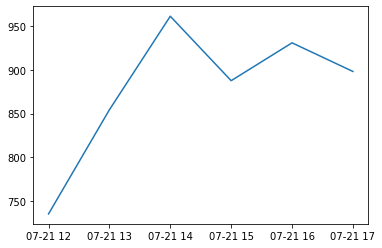

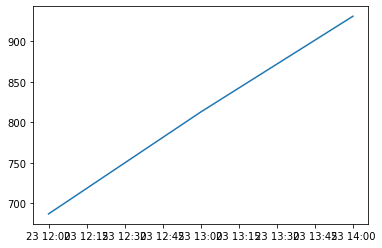

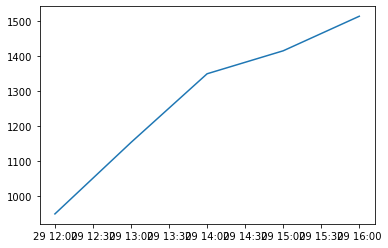

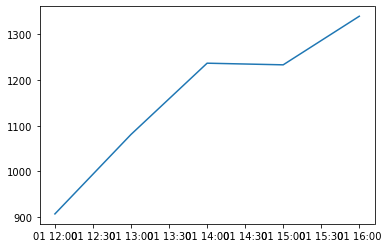

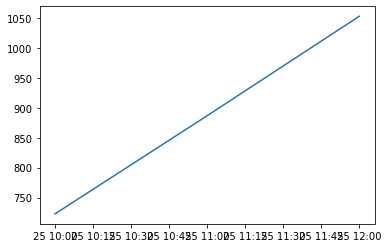

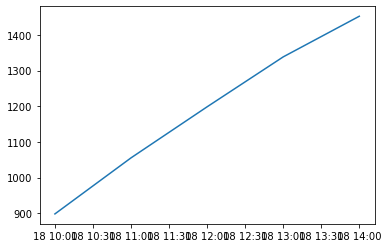

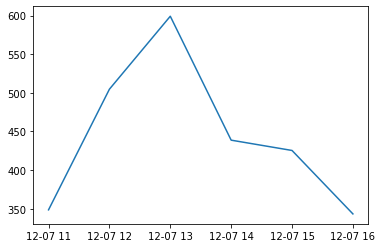

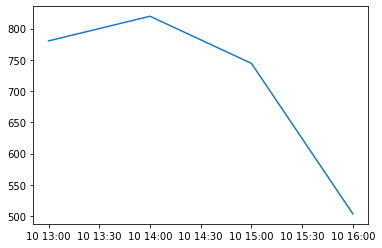

In [445]:
#plotting the boundary height for each flight 
print('Boundary layer by time for each flight over Merced')
def plotting(data):
    plt.figure()
    time = convert(data.time)
    blh = data.BLH
    print(time)
    y = blh.mean(dim=['latitude', 'longitude'])
    plt.plot(time, y)
for flight in flights:
    plotting(flight)

## Calculating the mass of methane emissions for each flight over Merced 

Key assumptions:      
Methane data is between 36.5-38.5N, 119.5-121.6W       
Background concentrations can be calculated by the lowest 10% or lowest 5 measurements, whichever uses more measurements        
Emissions can be calculated by the median of the highest 50% of measurements         
Moles per liter (22.4) is calculated with standard tempurature and pressure (stp)      
Boundary layer height is calculated using the the mean height of the time the plane was over Merced County         

In [171]:
import numpy as np
import geopandas as gpd
data = pd.read_csv('sarp_data_09_21.csv', sep=',')
data = data[data['Longitude'].notna()]
data = data[data['Latitude'].notna()]
data = data.replace({-999: np.nan, -888: np.nan})
data = data.drop(3738)
geodata = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']), 
    crs='epsg:4326')

In [312]:
#methane concentrations between 36.5-38.5N, 119.5-121.5W
merceddata = geodata[(geodata['Latitude']<38.5)&(geodata['Latitude']>36.5)&(geodata['Longitude']<-119.5)&(geodata['Longitude']>-121.5)]
nine1 = merceddata[(merceddata['Year']==2009)&(merceddata['Flight']=='1')]
print('2009 ',nine1['Year'].size)
nine2 = merceddata[(merceddata['Year']==2009)&(merceddata['Flight']=='2')]
print('2009 ',nine2['Year'].size)
ten1 = merceddata[(merceddata['Year']==2010)&(merceddata['Flight']=='1')]
print('2010 ',ten1['Year'].size)
ten2 = merceddata[(merceddata['Year']==2010)&(merceddata['Flight']=='2')]
print('2010 ',ten2['Year'].size)
four = merceddata[merceddata['Year']==2014] 
print('2014 ',four['Year'].size)
six = merceddata[merceddata['Year']==2016]
print('2016 ',six['Year'].size)
one2 = merceddata[(merceddata['Year']==2021)&(merceddata['Jday']<343)]
print('2021 ',one2['Year'].size)
one6 = merceddata[(merceddata['Year']==2021)&(merceddata['Jday']>343)]
print('2021 ',one6['Year'].size)

In [340]:
def delta(data, b, h):
    data = data.sort_values('CH4 (ppmv)')
    background = data[0:b]['CH4 (ppmv)'].median()
    print("The background concentration is ",background)
    high = data[h:]['CH4 (ppmv)'].median()
    print("The average emissions concentration is ",high)
    #print(high-background)
    return (high-background)
#min 5 measurements for background, otherwise bottom 10%
#high concentrations are the highest 50% of data
d91 = delta(nine1, 9, 41)
d92 = delta(nine2, 9, 42)
d101 = delta(ten1, 6, 26)
d102 = delta(ten2, 5, 23)
d4 = delta(four, 5, 16)
d6 = delta(six, 5, 12)
d12 = delta(one2, 7, 32)
d16 = delta(one6, 5, 19)

The background concentration is  1.774
The average emissions concentration is  1.909
The background concentration is  1.826
The average emissions concentration is  1.952
The background concentration is  1.8039999999999998
The average emissions concentration is  1.9505
The background concentration is  1.826
The average emissions concentration is  1.926
The background concentration is  1.859
The average emissions concentration is  1.9769999999999999
The background concentration is  1.843
The average emissions concentration is  1.937
The background concentration is  1.93
The average emissions concentration is  2.667
The background concentration is  1.94
The average emissions concentration is  2.1094999999999997


In [444]:
#equation relating boundary layer height to mass of methane emissions
AREAKM = 9835 #km2, taken from google maps
ML = 1/22.4 #moles per liter, stp
GM = 16 #grams/mole of methane
masses = []  
def equation(data, delta):
    data = data.to_dataframe()
    blh = data.mean() #data here is a timeslice of monthly blh dataset
    #print("The mean boundary layer height on this flight is ",blh)
    volCM = AREAKM*1000*100*blh*1000
    volL = volCM/1000
    moles = volL*ML
    #print("The number of moles in the designated box is ",moles)
    pp1 = delta/1000000 #delta is in ppm and needs to be converted
    conc = pp1*moles
    grams = moles*GM
    #print("The number of grams of methane emitted is ",grams,"\n\n")
    return grams[0]
masses.append(equation(flights[0], d91))
masses.append(equation(flights[1], d92))
masses.append(equation(flights[2],d101))
masses.append(equation(flights[3],d102))
masses.append(equation(flights[4], d4))
masses.append(equation(flights[5], d6))
masses.append(equation(flights[6], d12))
masses.append(equation(flights[7], d16))
print(masses)

[616716277465.8204, 569106638183.5938, 896497621765.1367, 814701564331.0547, 623508840179.4434, 834933255615.2343, 311434963531.49414, 500148699645.9961]


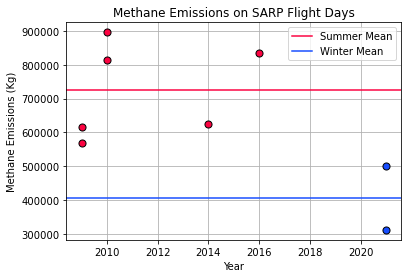

In [443]:
fig, ax = plt.subplots()
masses = np.divide(masses, 1000)
x = [2009, 2009, 2010, 2010, 2014, 2016, 2021, 2021]
plt.scatter(x[0:6],masses[0:6], s=50, c='#fc0341', edgecolor='#000000')
plt.scatter(x[6:8],masses[6:8], s=50, c='#174dff', edgecolor='#000000')
plt.axhline(np.mean(masses[0:6]), c='#fc0341', label='Summer Mean')
plt.axhline(np.mean(masses[6:8]), c='#174dff', label='Winter Mean')
plt.grid()
ax.set_axisbelow(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Methane Emissions (Kg)')
plt.title('Methane Emissions on SARP Flight Days')
plt.savefig('emission', dpi=700)

In [316]:
print(np.mean(masses[0:6]))
print(np.mean(masses[6:8]))

725910699.5900472
405791831.5887451


# Plotting boundary layer height over time

Text(0.5, 1.0, 'December 2021 Boundary Layer Height')

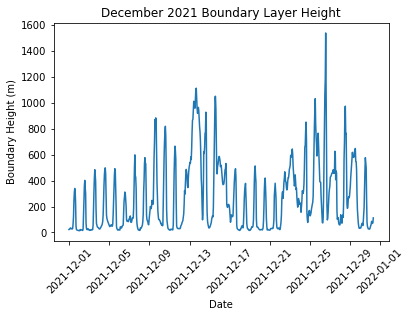

In [233]:
fig, ax = plt.subplots()
dec21 = blh.sel(time=slice('2021-12-1T07:00:00.000000000','2021-12-31T16:00:00.000000000'))
y = dec21.mean(dim=['latitude', 'longitude'])
date = pd.Series(dec21.time.values)
date = date.dt.tz_localize('UTC')
date = date.dt.tz_convert('US/Pacific')
ax.plot(date, y)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Boundary Height (m)')
plt.title('December 2021 Boundary Layer Height')

C:\Users\SARP\AppData\Local\Temp\ipykernel_36680\2481022672.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])


(0.0, 1000.0)

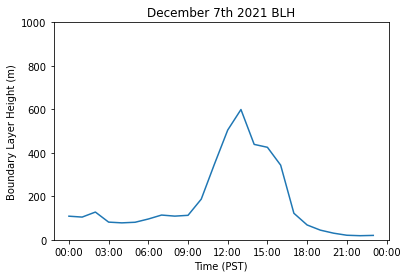

In [379]:
fig, ax = plt.subplots()
dec7 = blh.sel(time=slice('2021-12-7T08:00:00.000000000','2021-12-8T07:00:00.000000000'))
y = dec7.mean(dim=['latitude', 'longitude'])
date = pd.Series(dec7.time.values)
date = date.dt.tz_localize('UTC')
date = date.dt.tz_convert('US/Pacific')
ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])
ax.plot(date,y)
plt.title('December 7th 2021 BLH')
plt.xlabel('Time (PST)')
plt.ylabel('Boundary Layer Height (m)')
plt.ylim(0, 1000)

C:\Users\SARP\AppData\Local\Temp\ipykernel_36680\738535807.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])


(0.0, 1000.0)

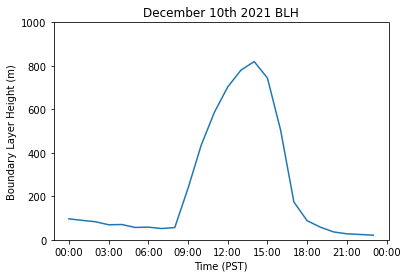

In [363]:
fig, ax = plt.subplots()
dec10 = december2021.BLH.sel(time=slice('2021-12-10T08:00:00.000000000','2021-12-11T07:00:00.000000000'))
date = pd.Series(dec10.time.values)
date = date.dt.tz_localize('UTC')
date = date.dt.tz_convert('US/Pacific')
y = dec10.mean(dim=['latitude', 'longitude'])
x = date
ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])
ax.plot(x,y)
plt.title('December 10th 2021 BLH')
plt.xlabel('Time (PST)')
plt.ylabel('Boundary Layer Height (m)')
plt.ylim(0, 1000)

C:\Users\SARP\AppData\Local\Temp\ipykernel_36680\908878652.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])


(0.0, 1000.0)

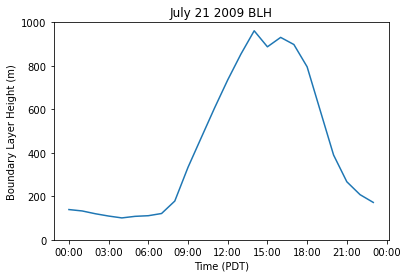

In [364]:
fig, ax = plt.subplots()
july21 = july2009.BLH.sel(time=slice('2009-07-21T07:00:00.000000000','2009-07-22T06:00:00.000000000'))
y = july21.mean(dim=['latitude', 'longitude'])
date = pd.Series(july21.time.values)
date = date.dt.tz_localize('UTC')
date = date.dt.tz_convert('US/Pacific')
ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])
ax.plot(date,y)
plt.title('July 21 2009 BLH')
plt.xlabel('Time (PDT)')
plt.ylabel('Boundary Layer Height (m)')
plt.ylim(0, 1000)

# SARP methane concentrations over time

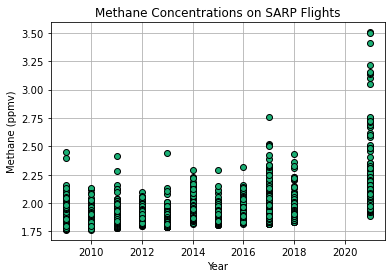

In [438]:
fig, ax = plt.subplots()
conc = geodata[(geodata['Year']<=2015) | (geodata['Year']>=2016)]
x = conc['Year']
y = conc['CH4 (ppmv)']
plt.scatter(x, y, c='#1ab075', edgecolor='#000000')
#plt.scatter(x, y) 
plt.grid()
plt.xlabel('Year')
plt.ylabel('Methane (ppmv)')
plt.title('Methane Concentrations on SARP Flights')
ax.set_axisbelow(True)
plt.savefig('meth', dpi=700)

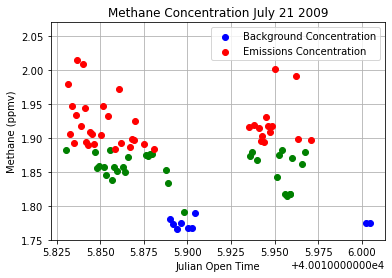

In [439]:
fig, ax = plt.subplots()
nine1 = nine1.sort_values('CH4 (ppmv)')
bottom = nine1[0:9]
mid = nine1[9:42]
top = nine1[42:]
x = nine1['Julian Open Time']
y1 = bottom['CH4 (ppmv)']
y2 = mid['CH4 (ppmv)']
y3 = top['CH4 (ppmv)']
#plt.scatter(x, y, c='#1ab075', edgecolor='#000000')
plt.scatter(x[0:9], y1, c='blue', label='Background Concentration')
plt.scatter(x[9:42], y2, c='green') 
plt.scatter(x[42:], y3, c='red', label='Emissions Concentration') 
plt.grid()
plt.xlabel('Julian Open Time')
plt.ylabel('Methane (ppmv)')
ax.set_ylim([1.75, 2.07])
plt.title('Methane Concentration July 21 2009')
ax.set_axisbelow(True)
plt.legend()
plt.savefig('delta', dpi=700)